In [19]:
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
import default_values as dv
import pandas as pd
import numpy as np

In [28]:
import numpy as np
from shapely.geometry import Point
from shapely.ops import unary_union
import geopandas as gpd

def generate_grid_in_polygon(spacing, polygon):
    ''' This Function generates evenly spaced points within the given GeoDataFrame.
        The parameter 'spacing' defines the distance between the points in coordinate units. '''
    
    # Convert the GeoDataFrame to a single polygon
    poly_in = unary_union([poly for poly in polygon.geometry])

    # Get the bounds of the polygon
    minx, miny, maxx, maxy = poly_in.bounds    
    
    # Now generate the entire grid
    x_coords = list(np.arange(np.floor(minx), int(np.ceil(maxx)), spacing))
    y_coords = list(np.arange(np.floor(miny), int(np.ceil(maxy)), spacing))
    
    grid = [Point(x) for x in zip(np.meshgrid(x_coords, y_coords)[0].flatten(), np.meshgrid(x_coords, y_coords)[1].flatten())]

    # Finally only keep the points within the polygon
    list_of_points = [point for point in grid if point.within(poly_in)]
    # list_of_points = [point for point in grid if poly_in.intersects(point)]

    return list_of_points

In [13]:
X, Y = generate_grid_in_polygon(dv.perimetro_pira_dissolved)

In [14]:
interp = LinearNDInterpolator(dv.variaveis, dv.argila)
Z = interp(X, Y)

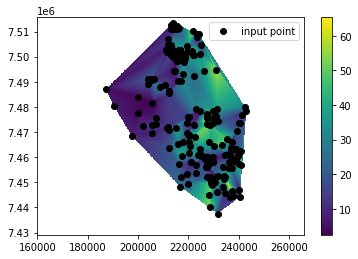

In [18]:
plt.pcolormesh(X, Y, Z, shading='auto')
plt.plot(dv.dataframe_coords.longitude, dv.dataframe_coords.latitude, "ok", label="input point")
plt.legend()
plt.colorbar()
plt.axis("equal")
plt.show()